In [1]:
%matplotlib notebook

import numpy as np
import os
import torch

import os
os.environ['pRT_input_data_path'] = os.path.join('/home/mvasist/pRT/input_data_paper/input_data')

# from dawgz import job, after, ensure, schedule
from itertools import starmap
from pathlib import Path
from typing import *

from lampe.data import JointLoader, H5Dataset
from lampe.distributions import BoxUniform

import sys
sys.path.insert(0, '/home/mvasist/WISEJ1828/sbi-ear/')
from ees import Simulator, LOWER, UPPER

import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd


scratch = os.environ.get('SCRATCH', '')
path = Path(scratch) / 'ear/data_22params_scaled1e5_noninf'
# path= Path(scratch) / 'ear/data_22params_scaled1e5_noninf/range-2to+2'

# scratch = '/scratch/users/frozet/'
# path = Path(scratch) / 'ees/data_379'

In [2]:
# %matplotlib --list

In [3]:
trainset = H5Dataset(path / 'train.h5')
obs = pd.read_csv('/home/mvasist/WISEJ1828/WISEJ1828/3/separated_WISE1828_spectrum_200223_send/spectrum.csv')

In [4]:
# t, x = trainset[0]
# len(trainset)

In [5]:
# m=np.array([])
# i=0
# for theta,x in tqdm(trainset):
#     m = np.append(m,np.mean(x.numpy()))

# np.save('averageofspec.npy', m)
# np.save('averageofspec_oldpaper.npy', m)


In [6]:
m = np.load('averageofspec.npy')
# m = np.load('averageofspec_oldpaper.npy')


In [9]:
a = np.arange(0, len(trainset))

array([2612842])

<IPython.core.display.Javascript object>


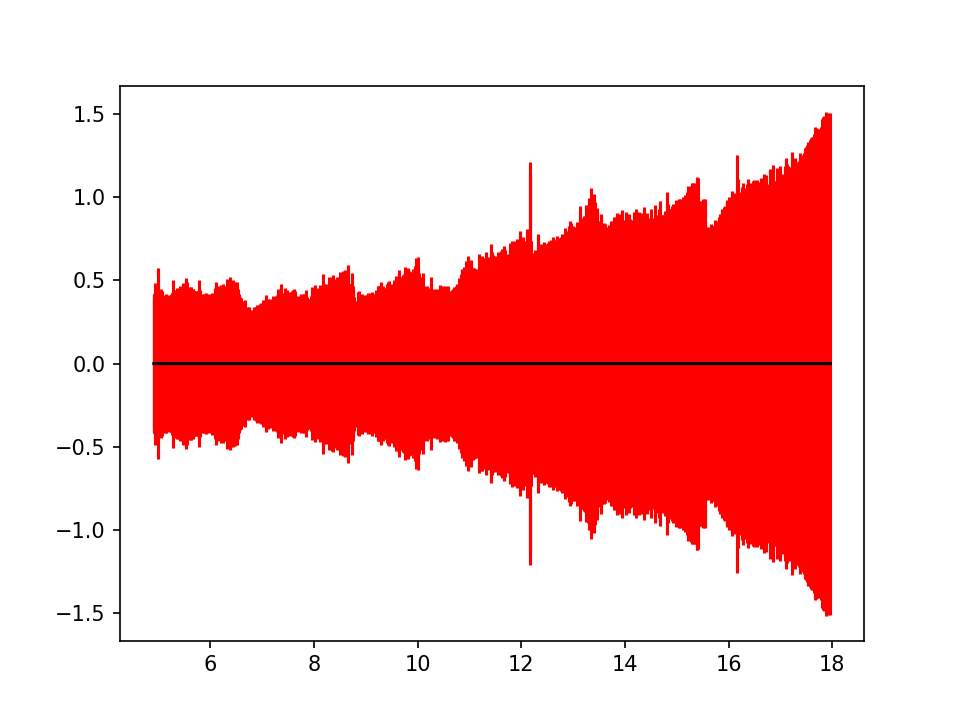

In [12]:
ind = a[m == min(m)][0]
t, x = trainset[ind]

plt.figure()
plt.errorbar(obs.iloc[:,0], x[87:1385], yerr= obs.iloc[:,2]*1e5,c= 'black', ecolor= 'red')
plt.show()

<IPython.core.display.Javascript object>


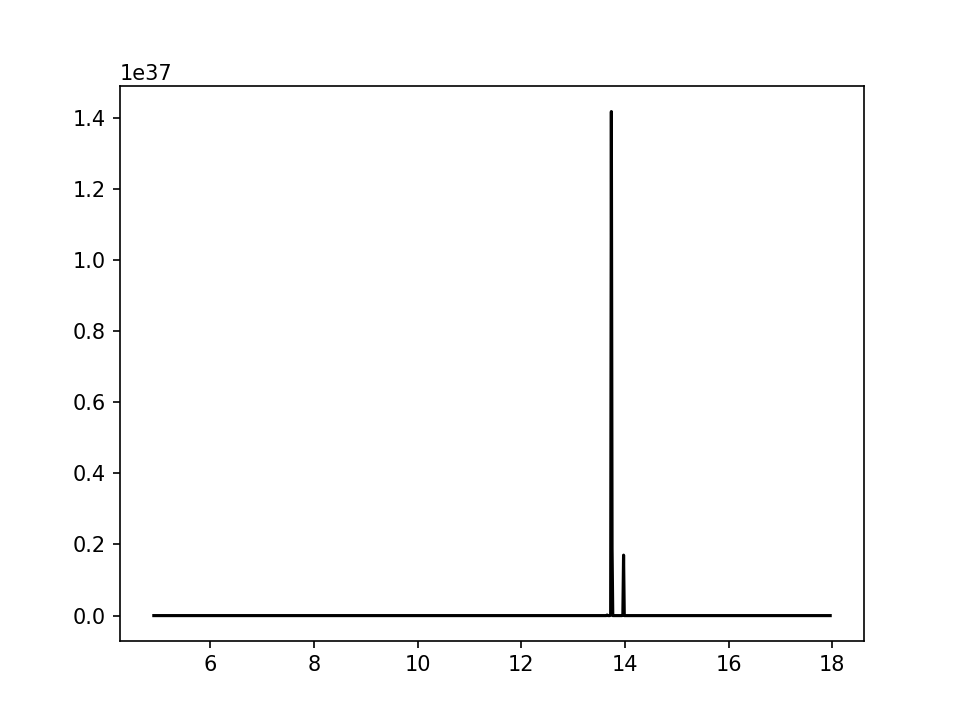

In [13]:
ind = a[m == max(m)][0]
t, x = trainset[ind]

plt.figure()
plt.errorbar(obs.iloc[:,0], x[87:1385], yerr= obs.iloc[:,2]*1e5, c= 'black', ecolor= 'red')
plt.show()

<IPython.core.display.Javascript object>


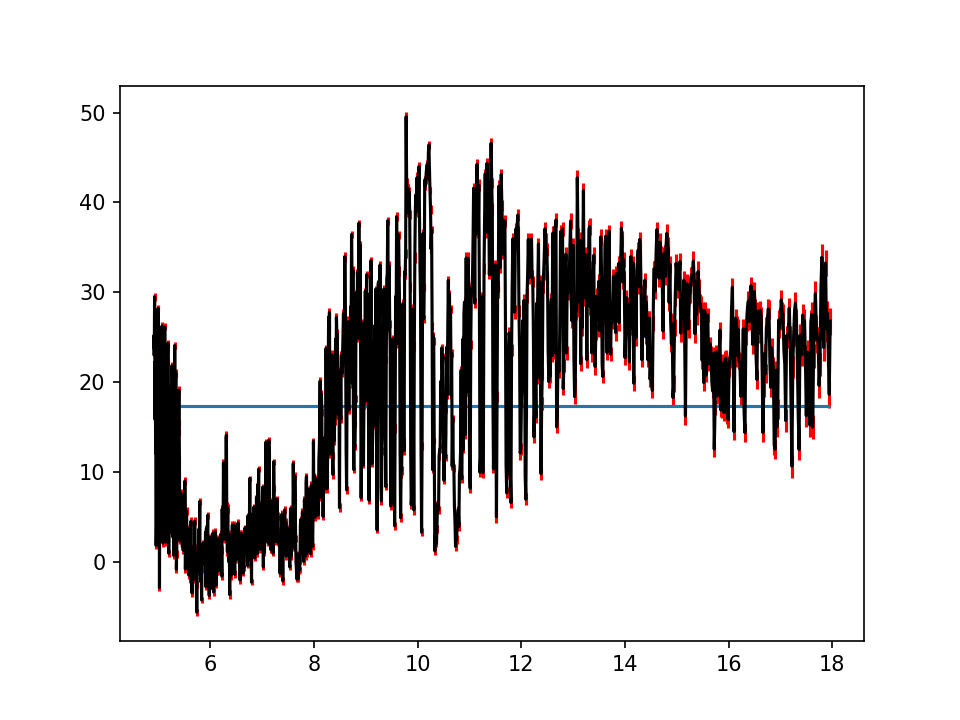

In [28]:
plt.figure()
plt.errorbar(obs.iloc[:,0], obs.iloc[:,1]*1e5, yerr= obs.iloc[:,2]*1e5, c = 'black', ecolor= 'red')
plt.hlines(np.mean(obs.iloc[:,1]*1e5), obs.iloc[0,0], obs.iloc[-1,0])
plt.show()

### For data in ear/data_22params_scaled1e5_noninf/rangelessthan60

In [34]:
mm = m[m<60]

<IPython.core.display.Javascript object>


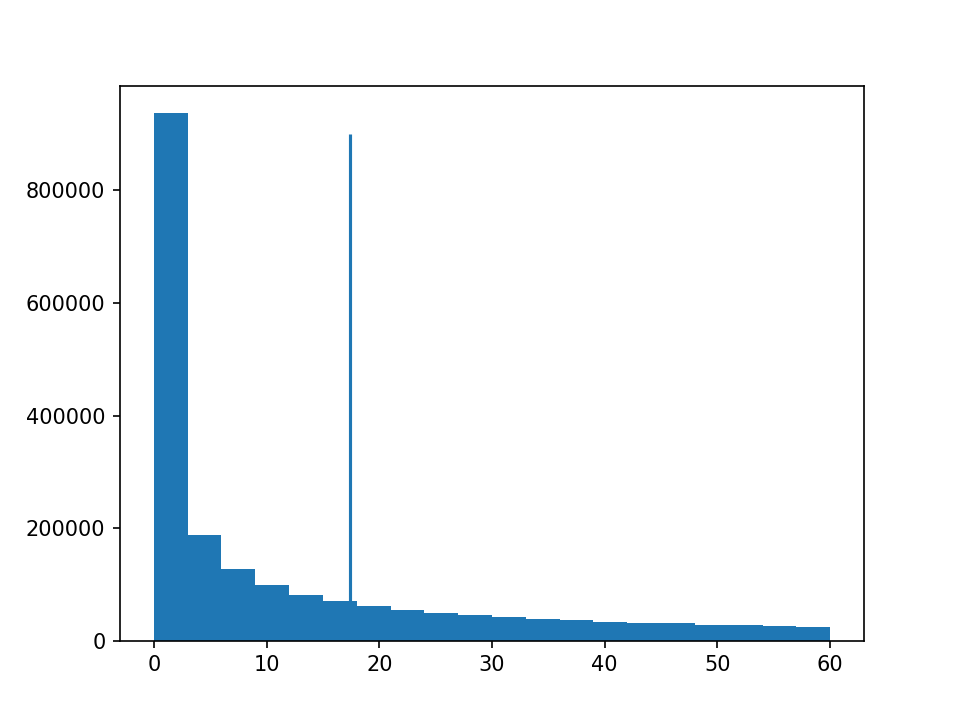

In [39]:
plt.figure()
plt.hist(mm, 20)
plt.vlines(np.mean(obs.iloc[:,1]*1e5), 0, 900000)

### For data in ear/data_22params_scaled1e5_noninf/range10to30

In [80]:
mm = m[((10<m) & (m<30))]
len(mm)

<IPython.core.display.Javascript object>


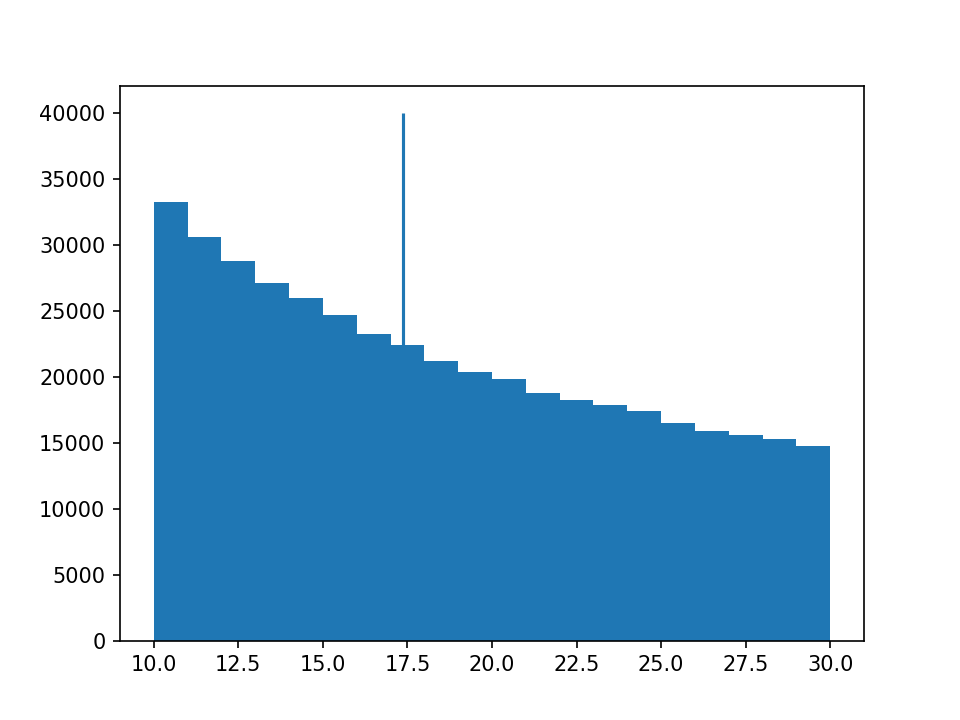

In [44]:
plt.figure()
plt.hist(mm, 20)
plt.vlines(np.mean(obs.iloc[:,1]*1e5), 0, 40000)

In [52]:
range10to30indx = a[((10<m) & (m<30))]

<IPython.core.display.Javascript object>


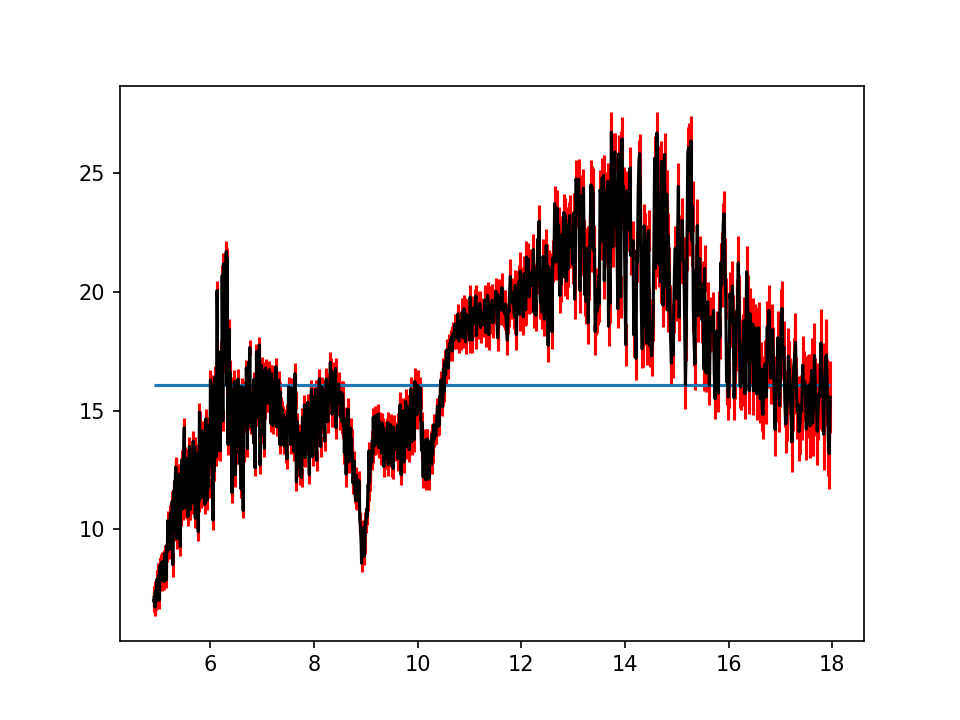

In [149]:
c = np.random.choice(range10to30indx)
th, x = trainset[c]

plt.figure()
plt.errorbar(obs.iloc[:,0], x[87:1385], yerr= obs.iloc[:,2]*1e5, c = 'black', ecolor= 'red')
plt.hlines(x[87:1385].mean(), obs.iloc[0,0], obs.iloc[-1,0])
plt.show()


In [150]:
print(min(x[87:1385]), max(x[87:1385]))
print(x[87:1385].var())

tensor(6.7286) tensor(26.7244)
tensor(15.4909)


tensor(0)

### For data in ear/data_22params_scaled1e5_noninf

In [15]:
min(m), max(m)

(2.9721274930475048e-34, 1.2354348200278785e+34)

<IPython.core.display.Javascript object>


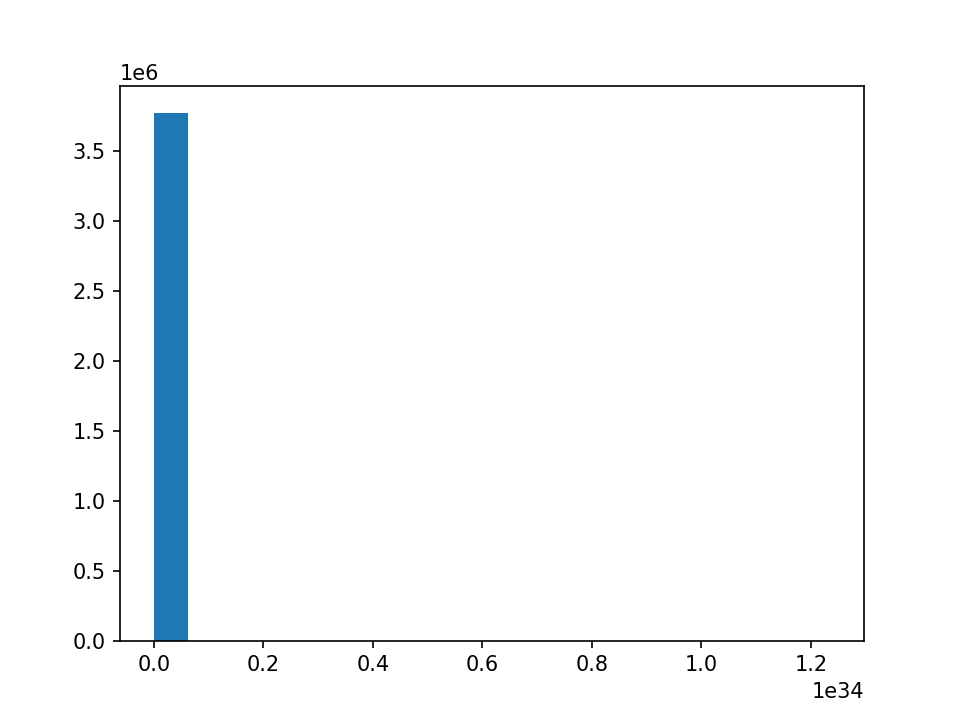

In [30]:
plt.figure()
plt.hist(m, 20)

# #between -10 to 10 --> most important
# plt.xlim(-10, 10) 
# plt.ylim(0, 5e6)  

# # between 0 to 5
# plt.xlim(0, 5) 
# plt.ylim(0, 5e6)  

# #between -30 to -3
# plt.xlim(-30, -3) 
# plt.ylim(0, 5e6) 

# # #between -3.099 to -3.098
# plt.xlim(-3.099, -3.098) 
# plt.ylim(0, 1e6) 

# # #between -3.0985 to 3
# plt.xlim(0.28, 0.3) 
# plt.ylim(0, 5e6) 

# #between -3.0985 to 3
# plt.xlim(3.6630, 3.6635) 
# plt.ylim(0, 5e6) 

plt.show()


In [3]:
pwd

'/home/mvasist/WISEJ1828/sbi-ear/added_scripts'

(array([310., 462.,  94., 101., 118.,  95.,  62.,  27.,  13.,  16.]),
 array([0.27495055, 0.39897773, 0.52300492, 0.64703211, 0.77105929,
        0.89508648, 1.01911366, 1.14314085, 1.26716804, 1.39119522,
        1.51522241]),
 <BarContainer object of 10 artists>)

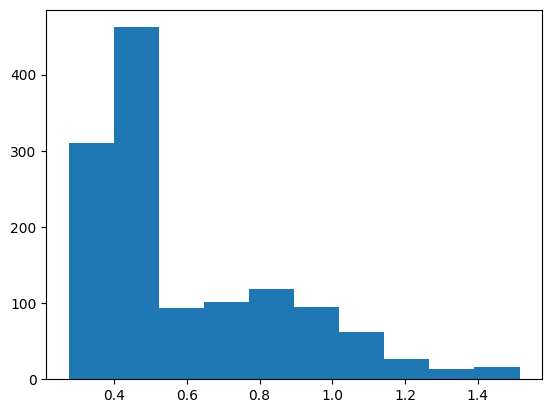

In [20]:
plt.hist(obs.iloc[:,2]*1e5)

In [17]:
## number of spectra less than -30 
(np.log10(m)<-30).sum() 

7503

In [39]:
## number of spectra btw -30 and -3.0985
((-3.0985> np.log10(m)) & (np.log10(m)>-30)).sum() 

200522

In [51]:
## number of spectra btw -3.0985 and 0.2825
((0.2825> np.log10(m)) & (np.log10(m)>-3.0985)).sum() 

626508

In [62]:
## number of spectra btw 0.2825 and 3.6634
((3.6634> np.log10(m)) & (np.log10(m)>0.2825)).sum()

2881492

In [65]:
## number of spectra over 3.6634
(3.6634< np.log10(m)).sum()

56391

In [66]:
(7503 + 200522 + 626508 + 2881492 + 56391)/ len(m)

1.0

In [68]:
7503/len(m), 200522/len(m), 626508/len(m), 2881492/len(m), 56391/len(m)

(0.00198891108509772,
 0.05315479522937025,
 0.16607606372149838,
 0.7638319845955484,
 0.014948245368485342)

In [ ]:
# around 15% and 75% - 90% is in the big peaks

### For data in ear/data

In [71]:
# notinf = np.where(np.isinf(m)==False)[0]
# print(notinf)
# m[notinf], len(m[notinf])

plt.hist(np.log10(m[notinf]), 20)

#between -10 to -1 --> most important
plt.xlim(-10, -1) 
plt.ylim(0, 5e6)  

#between 10 to -40
# plt.xlim(5, 40) 
# plt.ylim(0, 1e2)  

#between -30 to -40
# plt.xlim(-40, -30) 
# plt.ylim(0, 1e4)  


[      0       1       2 ... 3772413 3772414 3772415]


(array([5.01100317e-07, 2.79988694e-06, 1.45498198e-05, ...,
        5.63453832e-05, 9.76839568e-03, 4.52789209e-05]),
 3772207)

(0.0, 5000000.0)

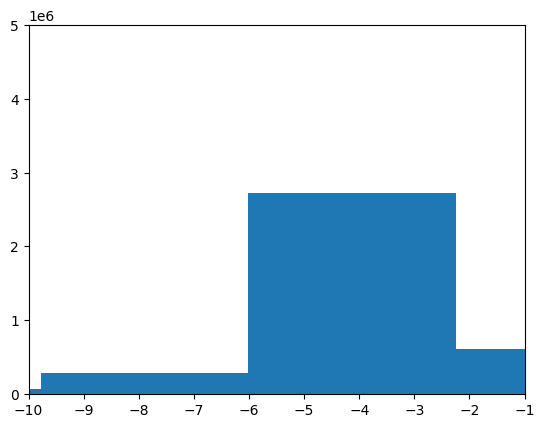

In [123]:
print((np.log10(m[notinf])<-30).sum()) ## number of spectra btw -30 and -40 -> 12342
print(((-10> np.log10(m[notinf])) & (np.log10(m[notinf])>-30)).sum()) ## number of spectra btw -10 and -30 -> 124571
print(((-1> np.log10(m[notinf])) & (np.log10(m[notinf])>-10)).sum()) ## number of spectra btw -1 and -10 -> 3625545
print((-1< np.log10(m[notinf])).sum()) ## number of spectra over -1 -> 9749

print(((-2.25> np.log10(m[notinf])) & (np.log10(m[notinf])>-6)).sum()/3772207 )
print(((-1> np.log10(m[notinf])) & (np.log10(m[notinf])>-2.25)).sum()/3772207 )
print(((-6> np.log10(m[notinf])) & (np.log10(m[notinf])>-10)).sum()/3772207 ) 



In [81]:
(12342+124571)/3772207+3625545/3772207+9749/3772207
## less than 4% of the log spectra are under -10


12342
124571
3625545
9749


In [128]:
# plt.hist(np.log10(m[notinf])/-11, 20)

plt.hist(np.log10(m[notinf]/1e-5))
## bulk of the scaled data
plt.xlim(-5, 4) 
plt.ylim(0, 5e6)  

0.7214187874631482
0.1601139598118555
0.07958762602370442


1.0

#### The scaling factor can be 1e6


(1.3549014721710224e-40, 2.3037689778033047e+35)

(0.0, 5000000.0)

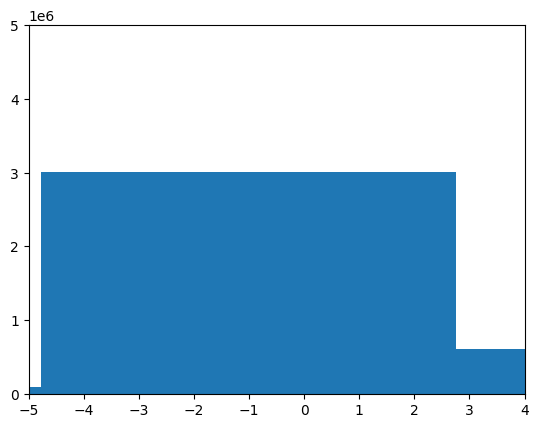

1e-06

## Finding infinities

In [9]:
indinf = np.where(np.isinf(m)==True)[0]

In [36]:
# np.savetxt('testfiles/infindx.txt', indinf)
# indinf_ = np.loadtxt('testfiles/infindx.txt')
# indinf_

In [52]:
theta_bestfit = np.array([1.4396112997602741, 4.987531968661369, 1007.792, 0.784, 0.720, 0.613, 0.517, 0.440, 0.407, 0.530, 0.621, 0.723, -1.987, \
                         -6.923, -4.156, -2.648, -3.875, -8.225, -9.241, -1.420, -6.435, -5.101, 10.613, -9.050])


In [84]:
i = np.arange(24)
a = np.delete(i, (2,3,4,5,6,7,8,9,10,11))
b = np.delete(i, (0, 1, 2, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23))
c = [2]
print(a,b,c)

[ 0  1 12 13 14 15 16 17 18 19 20 21 22 23] [ 3  4  5  6  7  8  9 10 11] [2]


In [85]:
 names = np.array(['R_pl', 'log_g', 'T_bottom', 'temp_node_1', 'temp_node_2', 'temp_node_3', 'temp_node_4', 'temp_node_5', 'temp_node_6', 'temp_node_7', 'temp_node_8', 'temp_node_9', 'H2O_mol_scale', 'CO2_mol_scale', 'CO_mol_scale', 'CH4_mol_scale', 'NH3_mol_scale', 'PH3_mol_scale', 'H2S_mol_scale', 'alkali_mol_scale', '15NH3_mol_scale', 'SO2_mol_scale', 'gamma', 'Mike_Line_b_MIRI'])

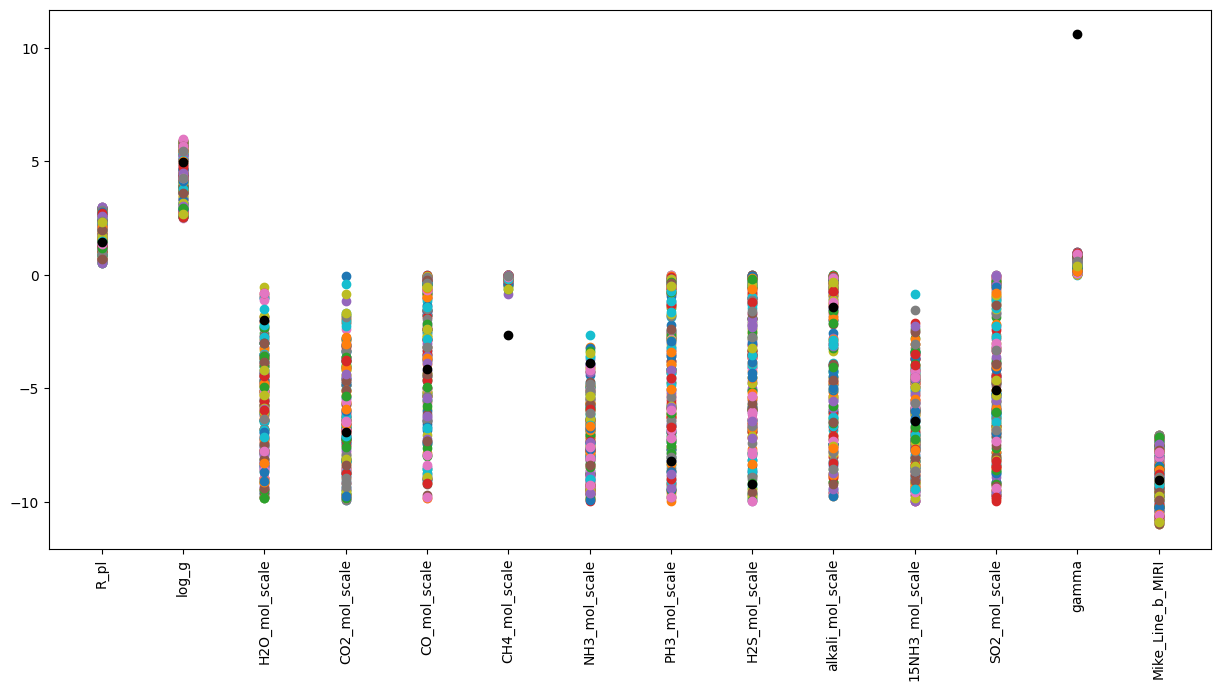

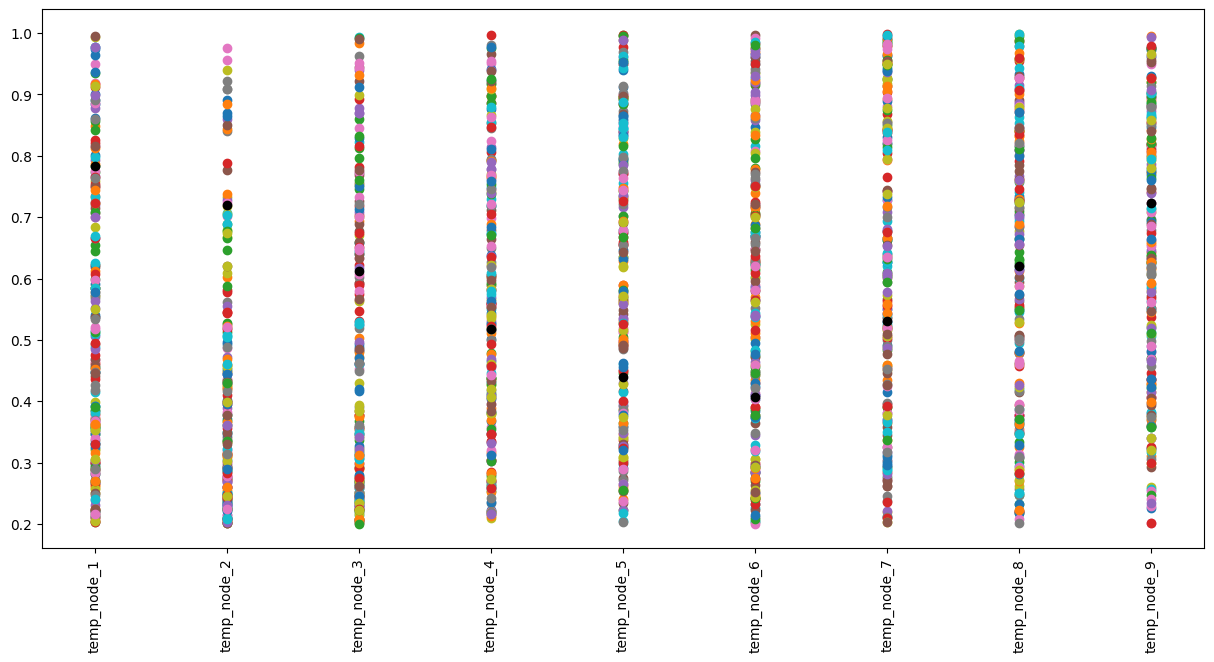

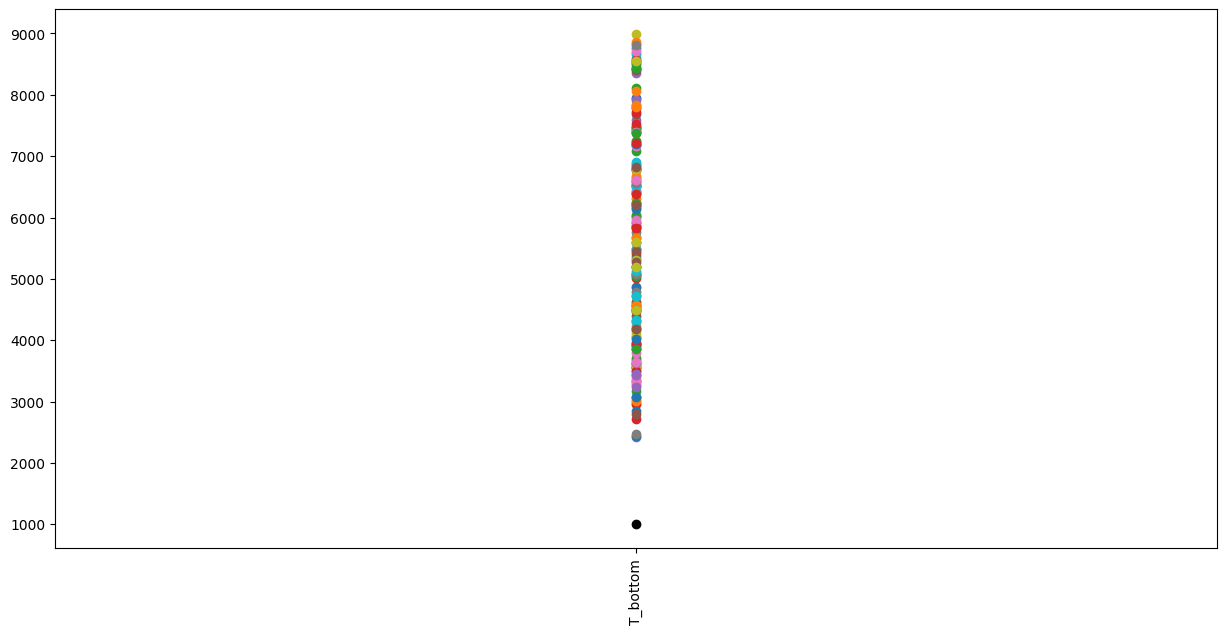

In [89]:
for j in [a, b, c]:
    plt.figure(figsize= (15,7))
    for i in indinf_:
        theta, x = trainset[int(i)]
        plt.scatter(np.arange(len(j)), theta[j])
    plt.scatter(np.arange(len(j)), theta_bestfit[j], c = 'black' )
    plt.xticks(np.arange(len(j)),names[j], rotation=90)
plt.show()

In [34]:
np.mean(trainset[:][1], axis = 1) 
np.var(trainset[:][1], axis = 1)

TypeError: unsupported operand type(s) for %: 'slice' and 'int'

In [156]:
a = torch.tensor([[1, float('inf'), 2, float('-inf'), float('nan')], [1, 6, 2, 8, float('nan')], [1, 6, 2, 8, 89]])
mask = ~torch.any(torch.isinf(a), dim=-1)
mask1 = ~torch.any(torch.isnan(a[mask]), dim=-1)
print(a[mask][mask1])

tensor([[ 1.,  6.,  2.,  8., 89.]])
